In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_text = pd.read_csv('training_text.csv',delimiter='\|\|',encoding='utf-8',index_col = None,skiprows=1,names = ['ID','text'])
train_v = pd.read_csv('training_variants.csv', index_col = None)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [3]:
test_text = pd.read_csv('test_text.csv',delimiter='\|\|',index_col = None,skiprows=1,names = ['ID','text'])
test_v = pd.read_csv('test_variants.csv', index_col = None)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [4]:
merged_train = pd.merge(train_v,train_text, on = ['ID'])

In [5]:
merged_train['text_freq'] = merged_train.groupby('text')['text'].transform('count')

In [6]:
merged_test = pd.merge(test_v,test_text, on=['ID'])

In [7]:
merged_test['text_freq'] = merged_test.groupby('text')['text'].transform('count')

In [8]:
# function to count frequency of words in each row
def word_count(df, words):    
    for word in words:
        w =[]
        for row in df['text']:
            n = row.lower().count(word)
            w.append(n)
        df[word] = w
    return df

In [39]:
#words = ['cancer','mutation','breast cancer']

In [40]:
#sns.pairplot(w[['Class','cancer','mutation','breast cancer']], hue="Class")


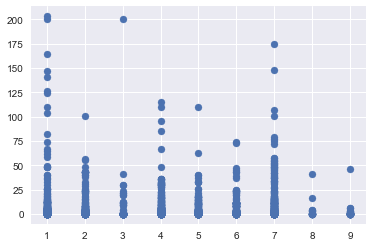

In [141]:
#plt.scatter(w['Class'],w['breast cancer'])

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
word_vectorizer = CountVectorizer(ngram_range=(1,1), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(list(merged_train['text']))
frequencies = sum(sparse_matrix).toarray()[0]
f = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])

In [17]:
f.reset_index(inplace = True)
f.sort_values('frequency', ascending = False,inplace= True)

In [18]:
f[:200]

,index,frequency
141067,the,1518614
105174,of,1248692
25371,and,938018
78908,in,920118
142705,to,568955
152115,with,390281
141012,that,291448
62357,for,277303
151603,were,261898
98884,mutations,238152


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(list(merged_train['text']))
frequencies = sum(sparse_matrix).toarray()[0]
h = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])

In [23]:
h.reset_index(inplace = True)
h.sort_values('frequency',ascending = False, inplace = True)

In [24]:
h[:200]

,index,frequency
1421890,of the,250499
1055660,in the,176646
778630,et al,103515
2005058,to the,71646
2141950,wild type,56323
2154726,with the,55196
324113,and the,53191
1332618,mutations in,50388
866085,for the,42131
1935362,that the,39215


In [12]:
words = 'mutat, cancer, patient, protein, express, tumor, variant, kinase, domain, brca1, egfr, activation, ras, p53, exon, growth, clinical, signaling, function, pten, phospharylation, residue, resistance, raf, pathway, alk, disease, receptor, missense, breast, braf, inhibit, lung, tyrosine, acid, induce, survival, proliferation, akt, imatinib, fusion, oncogenic, transcription, deleterous, flt3, melanoma, somatic, gefitinib, brct, myc, amplification, genomic, pathogenic, benign, p21, phosphatase, sp3b1, bat3'.split(', ')

In [13]:
merged_train_text = word_count(merged_train, words)

In [14]:
merged_test_text = word_count(merged_test, words)

In [18]:
train_bg = pd.read_csv('train_bg.csv')

In [50]:
del train_bg['Class']

In [51]:
merged_train_bg = pd.merge(train_bg,merged_train_text, on = ['ID'])

In [170]:
del merged_train_bg['Gene']

In [171]:
merged_train_bg.head()

,ID,Word_count,Variation_recoded,Class,text_freq,mutat,cancer,patient,protein,express,...,brct,myc,amplification,genomic,pathogenic,benign,p21,phosphatase,sp3b1,bat3
0,0,6089,Truncation,1,1,25,12,13,64,77,...,0,17,0,3,0,0,1,0,0,0
1,1,5756,Substitution,2,2,117,46,30,12,15,...,0,3,0,5,0,0,0,0,0,0
2,2,5756,Substitution,2,2,117,46,30,12,15,...,0,3,0,5,0,0,0,0,0,0
3,3,5572,Substitution,3,4,116,2,16,4,14,...,0,0,3,0,1,0,0,0,0,0
4,4,6202,Substitution,4,8,171,71,5,52,4,...,0,1,0,1,0,5,0,0,0,0


In [172]:
train_dummie = pd.get_dummies(merged_train_bg,columns = ['Variation_recoded'])

In [173]:
del train_dummie['ID']

In [174]:
train_dummie.head()

,Word_count,Class,text_freq,mutat,cancer,patient,protein,express,tumor,variant,...,Variation_recoded_Truncation,Variation_recoded_Wildtype,Variation_recoded_X1007_splice,Variation_recoded_X1008_splice,Variation_recoded_X1009_splice,Variation_recoded_X434_splice,Variation_recoded_X475_splice,Variation_recoded_X582_splice,Variation_recoded_X963_splice,Variation_recoded_p61BRAF
0,6089,1,1,25,12,13,64,77,4,0,...,1,0,0,0,0,0,0,0,0,0
1,5756,2,2,117,46,30,12,15,27,0,...,0,0,0,0,0,0,0,0,0,0
2,5756,2,2,117,46,30,12,15,27,0,...,0,0,0,0,0,0,0,0,0,0
3,5572,3,4,116,2,16,4,14,0,13,...,0,0,0,0,0,0,0,0,0,0
4,6202,4,8,171,71,5,52,4,10,2,...,0,0,0,0,0,0,0,0,0,0


In [175]:
y_train = train_dummie['Class']

In [176]:
y_train_dummie = y_train-1

In [177]:
del train_dummie['Class']

In [178]:
import xgboost as xgb
dtrain = xgb.DMatrix(train_dummie, y_train_dummie,feature_names=train_dummie.columns.values)

In [179]:
y_train_dummie.head()

0    0
1    1
2    1
3    2
4    3
Name: Class, dtype: int64

[0]	train-mlogloss:2.09642	test-mlogloss:2.11661
[50]	train-mlogloss:0.586991	test-mlogloss:1.07969
[100]	train-mlogloss:0.328332	test-mlogloss:0.986114


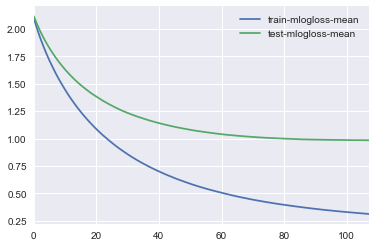

In [156]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 10,
    'min_child_weight': 1,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'multi:softprob',
    'eval_metric': 'mlogloss',
    'silent': 0,
    'num_class':9
}

cv_output = xgb.cv(xgb_params, dtrain, num_boost_round=1000, early_stopping_rounds=20,
    verbose_eval=50, show_stdv=False)
cv_output[['train-mlogloss-mean', 'test-mlogloss-mean']].plot()

In [157]:
model_1 = xgb.train(xgb_params, dtrain, num_boost_round=60)

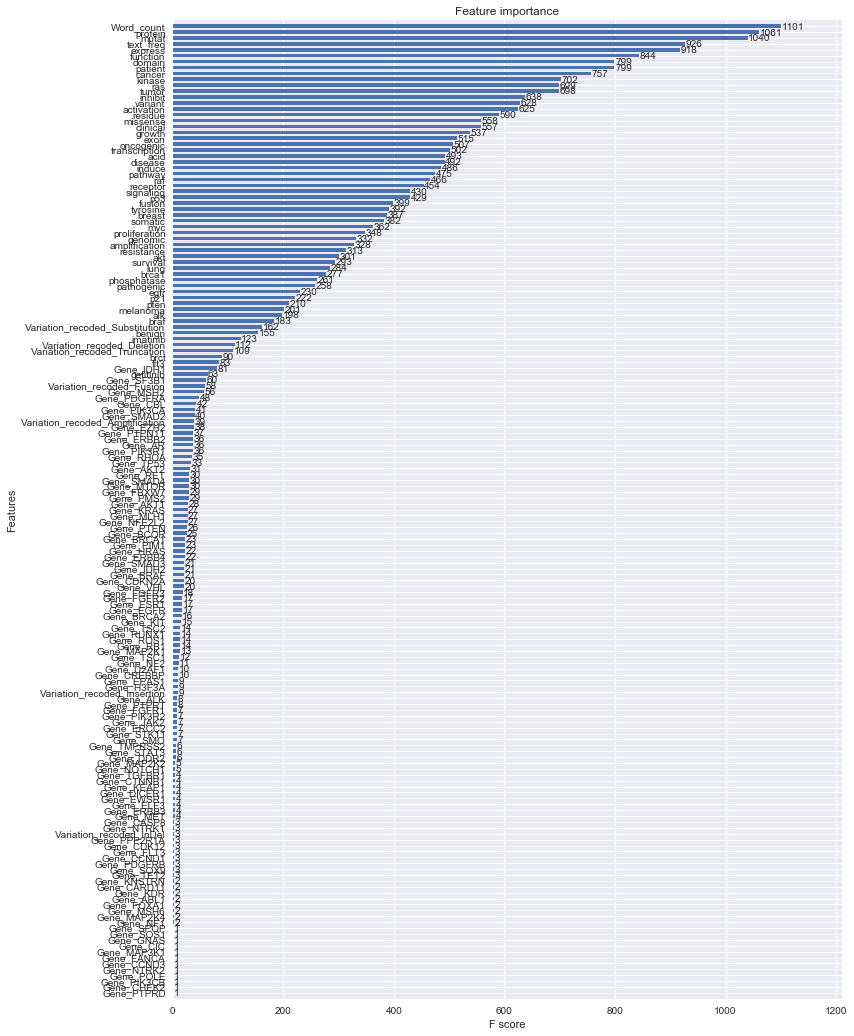

In [160]:
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model_1,height=0.6, ax=ax)

In [166]:
from sklearn.grid_search import GridSearchCV 
from xgboost.sklearn import XGBClassifier
param_test1 = {
 'max_depth':list(range(4,12,2)),
 'min_child_weight':list(range(1,6,2))
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.05, n_estimators=10, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.7, colsample_bytree=0.7,
 objective= 'multi:softprob', scale_pos_weight=1, seed=27), 
 param_grid = param_test1,scoring='neg_log_loss', iid=False, cv=5)
gsearch1.fit(train_dummie, y_train_dummie)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: -1.85905, std: 0.05929, params: {'max_depth': 4, 'min_child_weight': 1},
  mean: -1.85878, std: 0.05822, params: {'max_depth': 4, 'min_child_weight': 3},
  mean: -1.86317, std: 0.05287, params: {'max_depth': 4, 'min_child_weight': 5},
  mean: -1.84481, std: 0.06650, params: {'max_depth': 6, 'min_child_weight': 1},
  mean: -1.84287, std: 0.06281, params: {'max_depth': 6, 'min_child_weight': 3},
  mean: -1.84492, std: 0.06017, params: {'max_depth': 6, 'min_child_weight': 5},
  mean: -1.84363, std: 0.06765, params: {'max_depth': 8, 'min_child_weight': 1},
  mean: -1.84131, std: 0.06521, params: {'max_depth': 8, 'min_child_weight': 3},
  mean: -1.84422, std: 0.06002, params: {'max_depth': 8, 'min_child_weight': 5},
  mean: -1.84866, std: 0.06653, params: {'max_depth': 10, 'min_child_weight': 1},
  mean: -1.84205, std: 0.06529, params: {'max_depth': 10, 'min_child_weight': 3},
  mean: -1.84418, std: 0.05965, params: {'max_depth': 10, 'min_child_weight': 5}],
 {'max_depth': 8, 'min_c

In [167]:
param1 = {'max_depth':8, 'min_child_weight': 3,'eta':0.05, 'silent':1, 'objective':'multi:softprob','num_class':9,
        'eval_metric':'mlogloss','subsample':0.7,'colsample_bytree':0.7}
bst1 = xgb.train(param1, dtrain, 60)

In [ ]:
dtest = xgb.DMatrix(test_select,missing = -9999)

In [ ]:
bst1.predict(dtest)

In [68]:
from sklearn.grid_search import GridSearchCV 
from xgboost.sklearn import XGBClassifier
param_test1 = {'max_depth':[4],'min_child_weight':[3]}
gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.05, n_estimators=10, max_depth=5,min_child_weight=1, gamma=0, subsample=0.7, colsample_bytree=0.7,objective= 'reg:linear', scale_pos_weight=1, seed=27),param_grid = param_test1, scoring='neg_mean_squared_error',iid=False, cv=5)

#clf = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)
#clf.fit(train_dummie, y_train)
gsearch1.fit(train_dummie,y_train)
gsearch1.grid_scores_,gsearch1.best_params_, gsearch1.best_score_

([mean: -8.78861, std: 2.18021, params: {'max_depth': 4, 'min_child_weight': 3}],
 {'max_depth': 4, 'min_child_weight': 3},
 -8.788608064981577)

In [98]:
test_bg = pd.read_csv('test_bg.csv')

In [122]:
del test_bg['Gene']

In [124]:
merged_test_bg = pd.merge(test_bg,merged_test_text, on = ['ID'])

In [184]:
del merged_test_bg['ID']

In [181]:
test_dummie = pd.get_dummies(merged_test_bg,columns = ['Variation_recoded'])

In [182]:
train_dummie.head()

,Word_count,text_freq,mutat,cancer,patient,protein,express,tumor,variant,kinase,...,Variation_recoded_Truncation,Variation_recoded_Wildtype,Variation_recoded_X1007_splice,Variation_recoded_X1008_splice,Variation_recoded_X1009_splice,Variation_recoded_X434_splice,Variation_recoded_X475_splice,Variation_recoded_X582_splice,Variation_recoded_X963_splice,Variation_recoded_p61BRAF
0,6089,1,25,12,13,64,77,4,0,22,...,1,0,0,0,0,0,0,0,0,0
1,5756,2,117,46,30,12,15,27,0,10,...,0,0,0,0,0,0,0,0,0,0
2,5756,2,117,46,30,12,15,27,0,10,...,0,0,0,0,0,0,0,0,0,0
3,5572,4,116,2,16,4,14,0,13,22,...,0,0,0,0,0,0,0,0,0,0
4,6202,8,171,71,5,52,4,10,2,6,...,0,0,0,0,0,0,0,0,0,0


In [188]:
test_dummie.head()

,Word_count,text_freq,mutat,cancer,patient,protein,express,tumor,variant,kinase,...,Variation_recoded_null373C,Variation_recoded_null380R,Variation_recoded_null399R,Variation_recoded_null420W,Variation_recoded_null423L,Variation_recoded_null462G,Variation_recoded_null483L,Variation_recoded_null496R,Variation_recoded_null522S,Variation_recoded_null654G
0,7417,1,160,9,92,12,14,40,2,37,...,0,0,0,0,0,0,0,0,0,0
1,4710,1,20,26,5,34,23,30,0,6,...,0,0,0,0,0,0,0,0,0,0
2,11080,1,12,85,62,53,60,62,24,56,...,0,0,0,0,0,0,0,0,0,0
3,8380,1,13,19,20,46,78,42,1,96,...,0,0,0,0,0,0,0,0,0,0
4,11159,1,71,12,18,75,95,55,17,9,...,0,0,0,0,0,0,0,0,0,0


In [187]:
del test_dummie['ID']